In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.stats import chisquare
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as rmse

In [2]:
import acquire_zillow
import prepare_zillow as ppr

In [3]:
df = pd.read_csv('test.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## List of tools in prepare zillow (imported as ppr)

1. prep_zillow(df) - Preps a DF by removing non-standard houses
1. ~~df_missing_cols_in_rows(df) - returns original df, with 2 new columns, num of missing values, and % of total values~~
1. ~~df_missing_values_in_cols(df) - returns df with how many values each column is missing~~
1. missing_values(df,rows=False) - combination of above 2 functions. rows flag will return df_missing_cols_in_rows
1. drop_missing_rows_by_column(df,col) - drops all NaN rows by in a given column
1. outliers(df,col) - returns DF of all outliers(IQR method), OR DF with outliers dropped (can specify top only, or bot only)
1. scale_df(df,cols=[ ]) - Performs Min Max scaling on a DataFrame's Columns that are specified 

In [4]:
df = ppr.prep_zillow(df)
df = df.drop_duplicates(subset='parcelid')
df.drop('Unnamed: 0',axis=1,inplace = True)

In [5]:
df.shape

(157174, 67)

Checking missing values to decide what to do 

In [6]:
ppr.missing_values(df)

,column,percent missing,total missing
0,parcelid,0.000000,0
1,airconditioningtypeid,66.561263,104617
2,architecturalstyletypeid,99.707967,156715
3,basementsqft,99.941466,157082
4,bathroomcnt,0.000000,0
5,bedroomcnt,0.000000,0
6,buildingclasstypeid,100.000000,157174
7,buildingqualitytypeid,36.726176,57724
8,calculatedbathnbr,0.044537,70
9,decktypeid,99.197704,155913


Dropping all columns that are missing more than 10% of the entries

In [7]:
df = ppr.drop_cols_missing_percentage(df,10)

In [8]:
ppr.missing_values(df)

,column,percent missing,total missing
0,parcelid,0.000000,0
1,bathroomcnt,0.000000,0
2,bedroomcnt,0.000000,0
3,calculatedbathnbr,0.044537,70
4,calculatedfinishedsquarefeet,0.011452,18
5,finishedsquarefeet12,0.277400,436
6,fips,0.000000,0
7,fullbathcnt,0.044537,70
8,latitude,0.000000,0
9,longitude,0.000000,0


Dropping any remaining rows that have missing values

In [9]:
rows_to_drop = list(ppr.missing_values(df).column)

In [10]:
for row in rows_to_drop:
    df = ppr.drop_missing_rows_by_column(df,row)
ppr.missing_values(df)

,column,percent missing,total missing
0,parcelid,0.0,0
1,bathroomcnt,0.0,0
2,bedroomcnt,0.0,0
3,calculatedbathnbr,0.0,0
4,calculatedfinishedsquarefeet,0.0,0
5,finishedsquarefeet12,0.0,0
6,fips,0.0,0
7,fullbathcnt,0.0,0
8,latitude,0.0,0
9,longitude,0.0,0


In [11]:
df.shape

(153058, 27)

Make a new dataframe that only contains a handful of variables to work with for plotting

In [12]:
df2 = df[[
    'parcelid',
    'bathroomcnt',
    'bedroomcnt',
    'calculatedfinishedsquarefeet',
    'fips',
    'latitude',
    'longitude',
    'regionidcounty',
    'yearbuilt',
    'taxvaluedollarcnt',
    'transactiondate',
    'logerror'
    
]]

Make fips and regionid into objects(strings) since they are numeric, but in an ID sense, not a mathematical

In [13]:
df2['fips'] = df2['fips'].astype('object')
df2['regionidcounty'] = df2['regionidcounty'].astype('object')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153058 entries, 0 to 167853
Data columns (total 12 columns):
parcelid                        153058 non-null int64
bathroomcnt                     153058 non-null float64
bedroomcnt                      153058 non-null float64
calculatedfinishedsquarefeet    153058 non-null float64
fips                            153058 non-null object
latitude                        153058 non-null float64
longitude                       153058 non-null float64
regionidcounty                  153058 non-null object
yearbuilt                       153058 non-null float64
taxvaluedollarcnt               153058 non-null float64
transactiondate                 153058 non-null object
logerror                        153058 non-null float64
dtypes: float64(8), int64(1), object(3)
memory usage: 15.2+ MB


Check correlations between numeric fields to find correlations in an effort to reduce dimensions

In [15]:
numeric_cols = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt','logerror']

In [16]:
df2.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,yearbuilt,taxvaluedollarcnt,logerror
count,1.530580e+05,153058.000000,153058.000000,153058.000000,1.530580e+05,1.530580e+05,153058.000000,1.530580e+05,153058.000000
mean,1.300393e+07,2.273994,3.006364,1743.535705,3.400504e+07,-1.181984e+08,1969.531433,4.705734e+05,0.014788
std,2.187992e+06,0.936249,1.006703,911.530740,2.663095e+05,3.640366e+05,22.888197,5.888522e+05,0.158021
min,1.071174e+07,1.000000,0.000000,2.000000,3.333930e+07,-1.194753e+08,1878.000000,3.254000e+03,-4.655420
25%,1.154531e+07,2.000000,2.000000,1170.000000,3.380864e+07,-1.184161e+08,1954.000000,2.025370e+05,-0.023300
50%,1.259044e+07,2.000000,3.000000,1514.000000,3.402135e+07,-1.181656e+08,1971.000000,3.490550e+05,0.006278
75%,1.425241e+07,3.000000,4.000000,2051.000000,3.417476e+07,-1.179162e+08,1987.000000,5.510000e+05,0.038300
max,1.629608e+08,20.000000,16.000000,21929.000000,3.481877e+07,-1.175714e+08,2016.000000,2.775000e+07,5.262999


In [17]:
ppr.outliers(df2,'bedroomcnt').shape[0]

557

In [18]:
scaler = MinMaxScaler()

In [19]:
df3 = df2.copy()
for col in numeric_cols:
    scaler.fit(df2[[col]])
    df3[col]= scaler.transform(df2[[col]])

Things to do 
1. ~~Drop outliers~~
1. ~~MinMaxScaling~~
1. ~~Graph~~
1. ~~Cluster Model~~
1. ~~Regression on clusters~~


In [20]:
df2.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,yearbuilt,taxvaluedollarcnt,logerror
count,1.530580e+05,153058.000000,153058.000000,153058.000000,1.530580e+05,1.530580e+05,153058.000000,1.530580e+05,153058.000000
mean,1.300393e+07,2.273994,3.006364,1743.535705,3.400504e+07,-1.181984e+08,1969.531433,4.705734e+05,0.014788
std,2.187992e+06,0.936249,1.006703,911.530740,2.663095e+05,3.640366e+05,22.888197,5.888522e+05,0.158021
min,1.071174e+07,1.000000,0.000000,2.000000,3.333930e+07,-1.194753e+08,1878.000000,3.254000e+03,-4.655420
25%,1.154531e+07,2.000000,2.000000,1170.000000,3.380864e+07,-1.184161e+08,1954.000000,2.025370e+05,-0.023300
50%,1.259044e+07,2.000000,3.000000,1514.000000,3.402135e+07,-1.181656e+08,1971.000000,3.490550e+05,0.006278
75%,1.425241e+07,3.000000,4.000000,2051.000000,3.417476e+07,-1.179162e+08,1987.000000,5.510000e+05,0.038300
max,1.629608e+08,20.000000,16.000000,21929.000000,3.481877e+07,-1.175714e+08,2016.000000,2.775000e+07,5.262999


In [21]:
df2 = ppr.outliers(df2,'bathroomcnt',drop_top=True)
df2 = ppr.outliers(df2,'bedroomcnt',drop_top=True)


In [22]:
df2 = ppr.outliers(df2,'calculatedfinishedsquarefeet',drop_bot=True)
#df2 = ppr.outliers(df2,'taxvaluedollarcnt',drop_to)

In [23]:
def scale_df(df,cols = []):
    scaler = MinMaxScaler()
    df = df.copy()
    for col in cols:
        scaler.fit(df[[col]])
        df[col] = scaler.transform(df[[col]])
    return df 

In [24]:
df2['bbcount'] = df2['bathroomcnt'] + df2['bedroomcnt']

In [25]:
df3 = scale_df(df2,cols=['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt','bbcount'])

In [26]:
df3.head()
list(df3.columns)
wdf= df3[['bbcount','calculatedfinishedsquarefeet','fips','latitude', 'longitude',
 'regionidcounty',
 'yearbuilt',
 'taxvaluedollarcnt',
 'transactiondate',
 'logerror',]]

## Cluster time

In [27]:
wdf.head()

,bbcount,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcounty,yearbuilt,taxvaluedollarcnt,transactiondate,logerror
0,0.380952,0.125160,6037,34280990.0,-118488536.0,3101,1959.0,0.026250,2016-01-01,0.0276
2,0.380952,0.167814,6037,34136312.0,-118175032.0,3101,1940.0,0.008579,2016-01-01,-0.0040
3,0.285714,0.057538,6037,33755800.0,-118309000.0,3101,1987.0,0.017771,2016-01-02,0.0218
4,0.523810,0.173095,6059,33485643.0,-117700234.0,1286,1981.0,0.031720,2016-01-02,-0.0050
5,0.666667,0.235835,6037,33870089.0,-118402768.0,3101,1982.0,0.179799,2016-01-02,-0.2705


##### Clustered Log and Lat to group like-locations

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

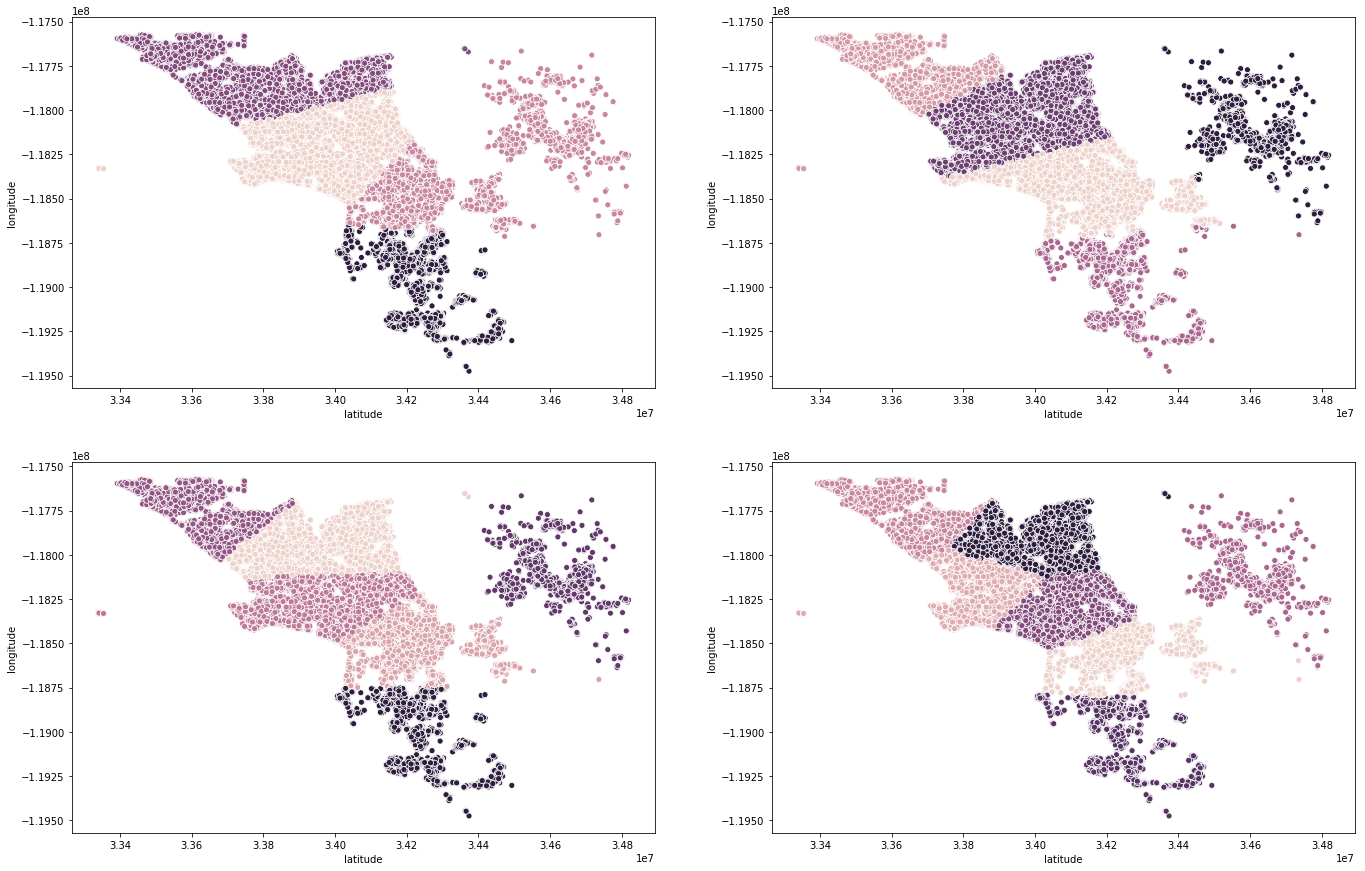

In [28]:
plt.subplots(figsize=(23,15))
for i in range(4,8):
    km = KMeans(n_clusters=i,random_state=123)
    clust_vars = ['latitude','longitude']

    km.fit(wdf[clust_vars])
    wdf['loc_clust'] = km.predict(wdf[clust_vars])

    km.inertia_
    
    plt.subplot(2,2,i-3)
    sns.scatterplot(wdf['latitude'],wdf['longitude'],hue= wdf['loc_clust'],legend=False)
    
    

In [29]:
km = KMeans(n_clusters=5,random_state=123)
clust_vars = ['latitude','longitude']

km.fit(wdf[clust_vars])

wdf['loc_clust'] = km.predict(wdf[clust_vars])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


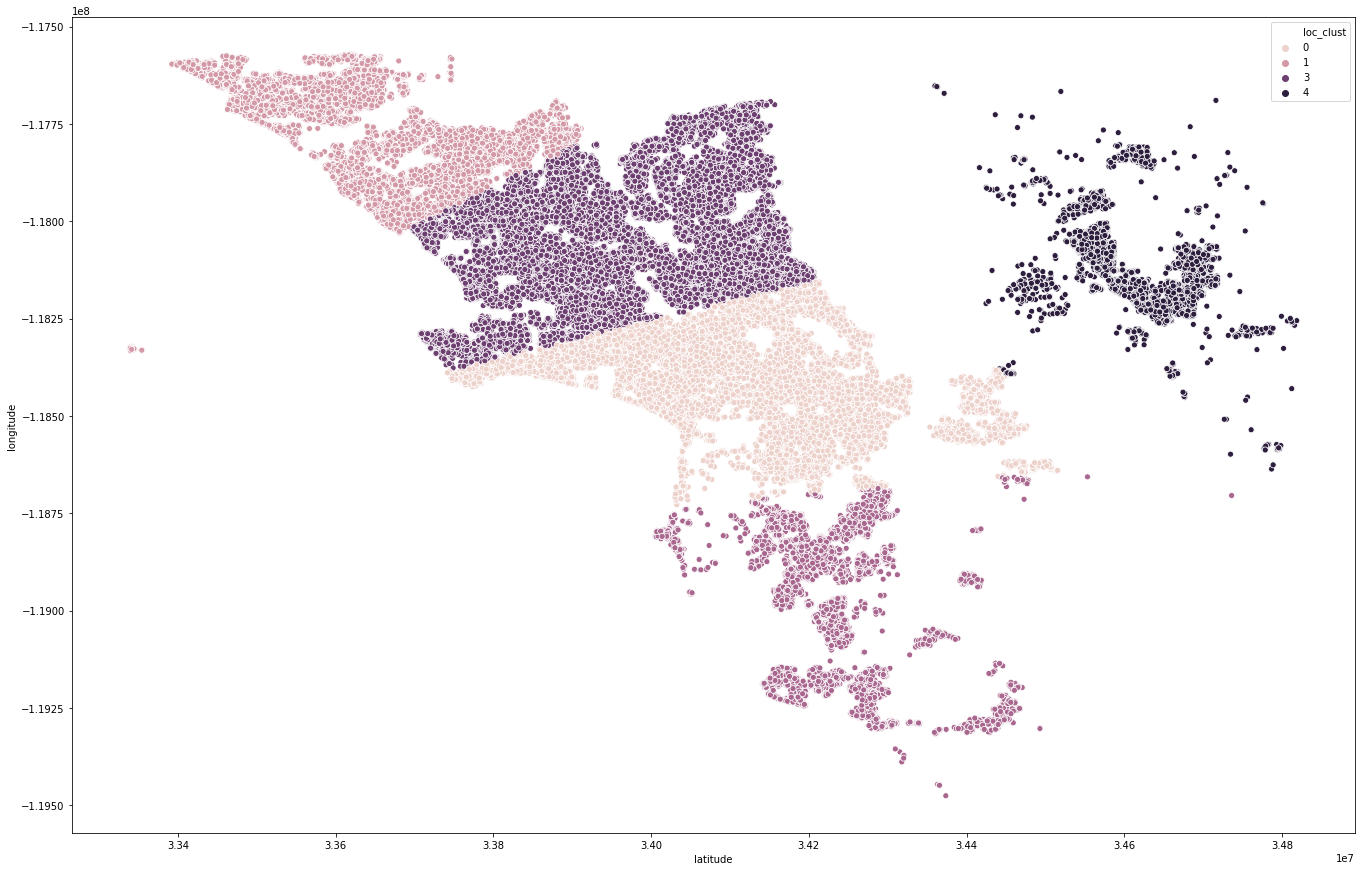

In [30]:
plt.subplots(figsize=(23,15))
sns.scatterplot(wdf['latitude'],wdf['longitude'],hue= wdf['loc_clust'])

In [31]:
wdf['bed and bath'] = wdf['bbcount']
wdf['square feet'] = wdf['calculatedfinishedsquarefeet']
wdf['tax value'] = wdf['taxvaluedollarcnt']
wdf['error'] = wdf['logerror'].abs()
wdf['age'] = 2017 - wdf['yearbuilt']
wdf = ppr.scale_df(wdf,['age'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_by_loc = []
for i in range(6):
    df_by_loc.append(wdf[wdf['loc_clust'] == i])

In [33]:
wdf2 = ppr.scale_df(wdf,['longitude','latitude'])

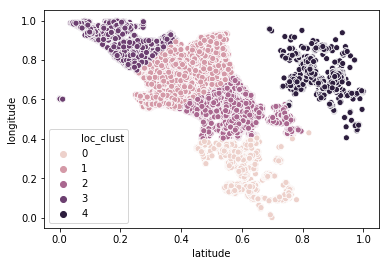

In [34]:
km = KMeans(n_clusters=5)
clust_vars = ['latitude','longitude']

km.fit(wdf2[clust_vars])

wdf2['loc_clust'] = km.predict(wdf2[clust_vars])
sns.scatterplot(wdf2['latitude'],wdf2['longitude'],hue= wdf2['loc_clust'],legend='full')

In [35]:
plot_cols = ['bed and bath',
 'square feet',
 'tax value',
 'transactiondate',
 'age',
 'error',]

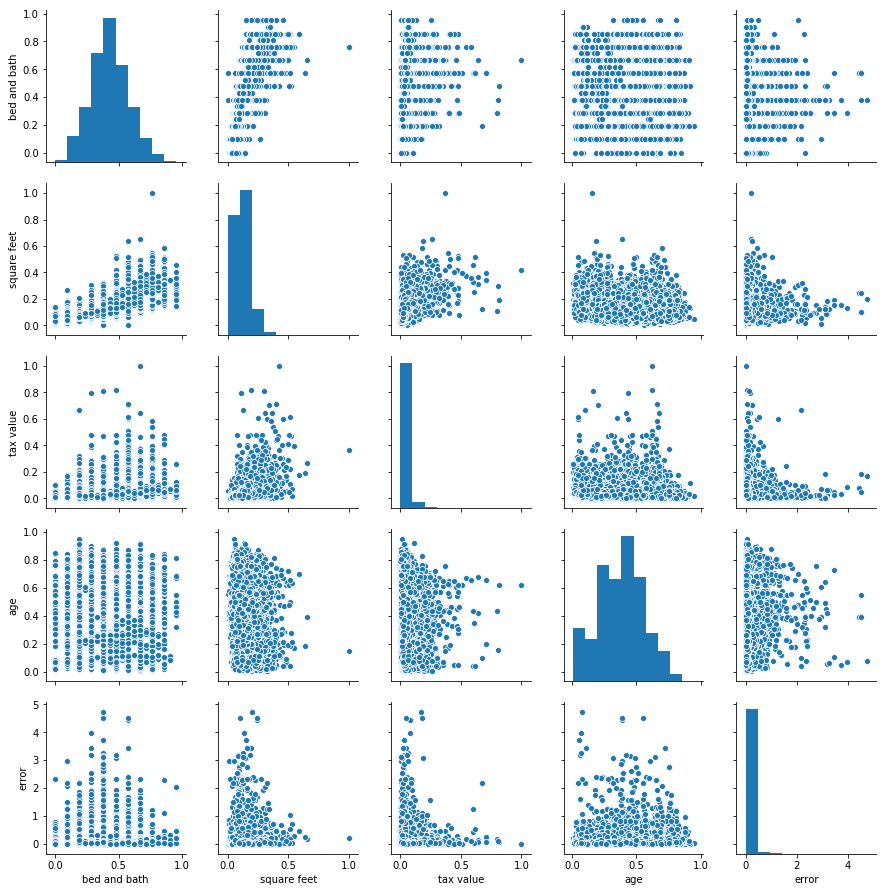

In [36]:

sns.pairplot((df_by_loc[0])[plot_cols])

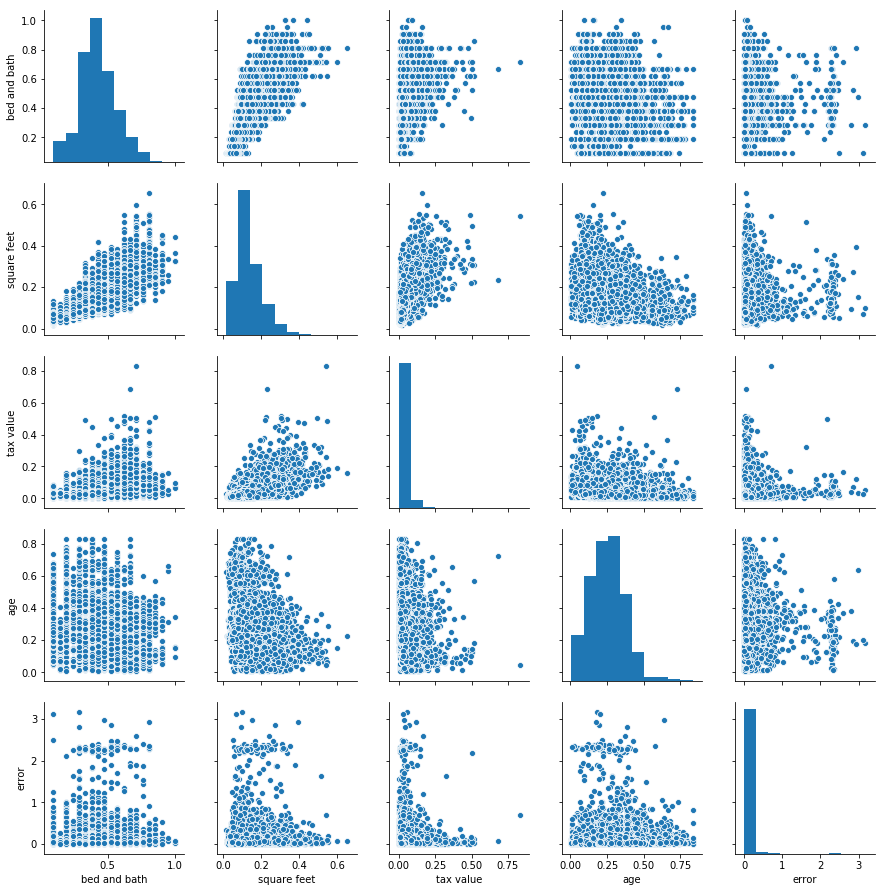

In [37]:
sns.pairplot((df_by_loc[1])[plot_cols])

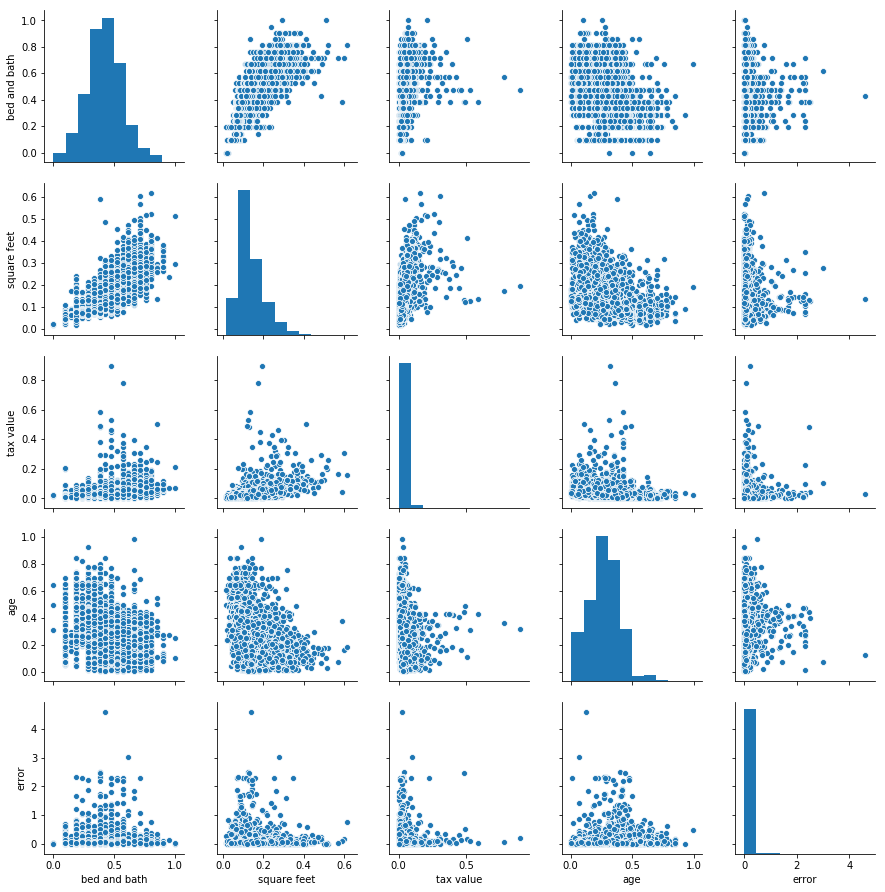

In [38]:
sns.pairplot((df_by_loc[2])[plot_cols])

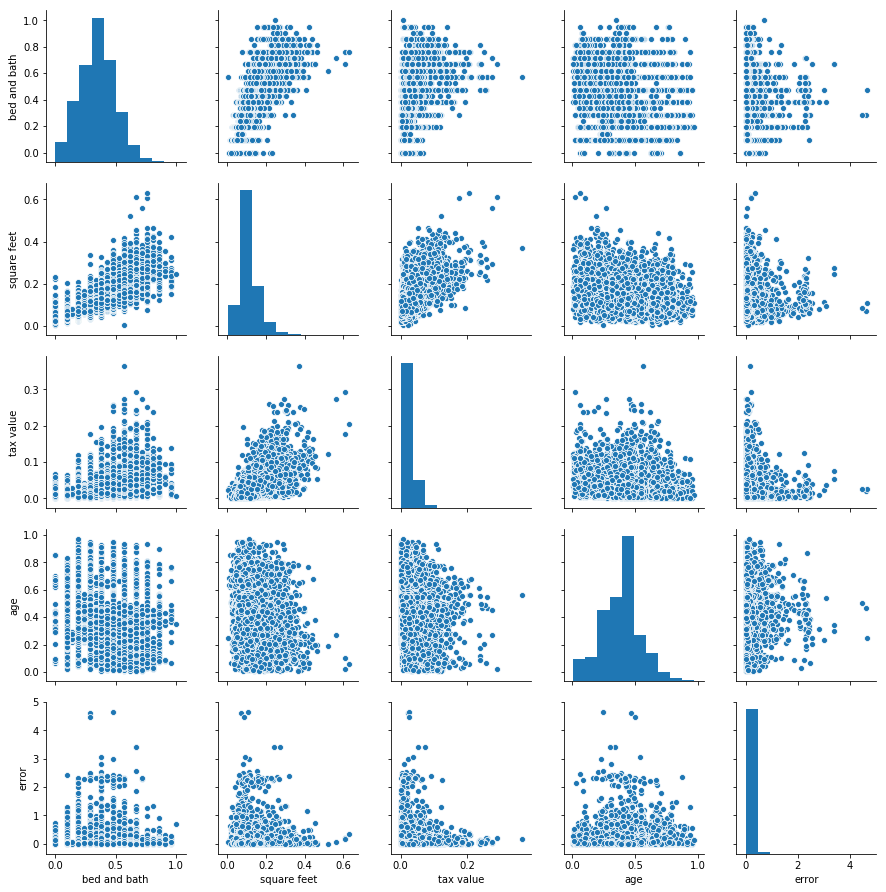

In [39]:
sns.pairplot((df_by_loc[3])[plot_cols])

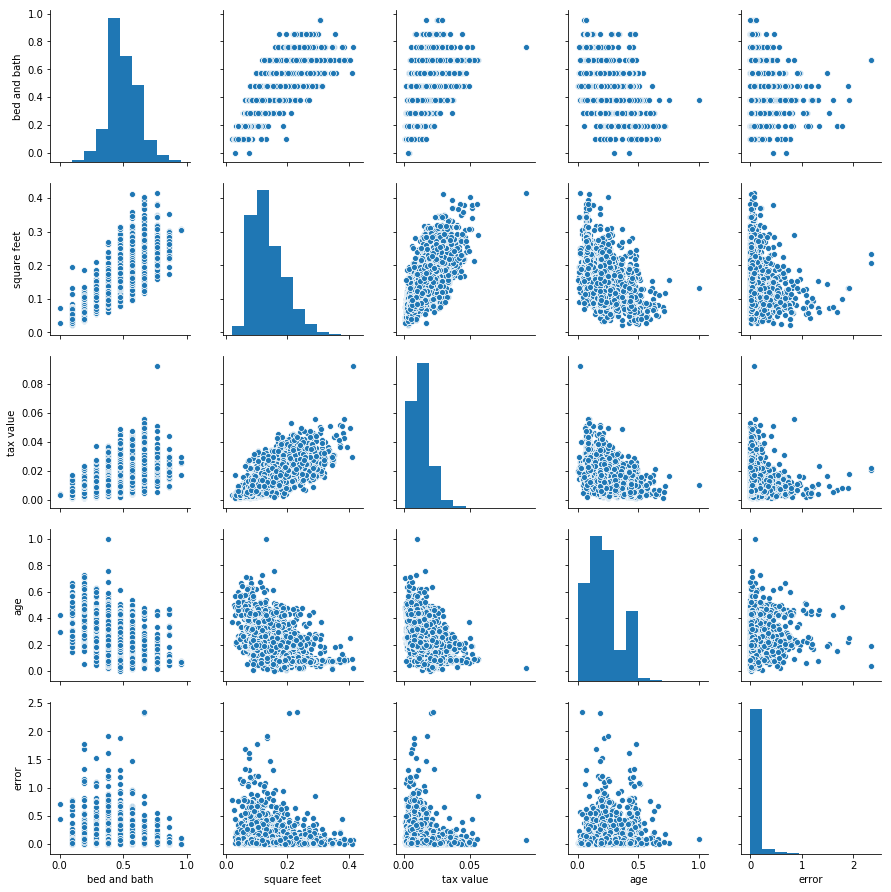

In [40]:
sns.pairplot((df_by_loc[4])[plot_cols])

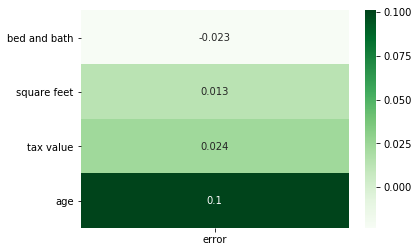

In [41]:
sns.heatmap(wdf[plot_cols].corr()[['error']].drop('error'),annot=True,cmap='Greens')

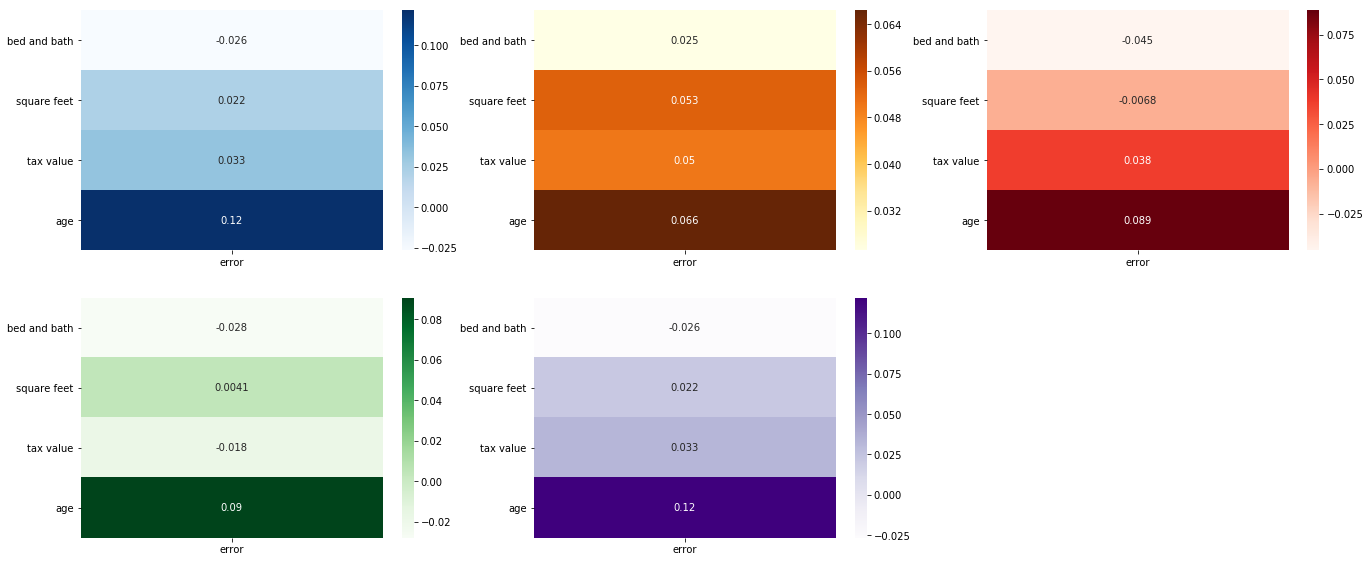

In [42]:
plt.subplots(figsize=(23,15))

plt.subplot(3,3,1)
sns.heatmap((df_by_loc[0][plot_cols].corr())[['error']].drop('error'),annot=True,cmap='Blues')

plt.subplot(3,3,2)
sns.heatmap((df_by_loc[1][plot_cols].corr())[['error']].drop('error'),annot=True,cmap='YlOrBr')

plt.subplot(3,3,3)
sns.heatmap((df_by_loc[2][plot_cols].corr())[['error']].drop('error'),annot=True,cmap='Reds')

plt.subplot(3,3,4)
sns.heatmap((df_by_loc[3][plot_cols].corr())[['error']].drop('error'),annot=True,cmap='Greens')

plt.subplot(3,3,5)
sns.heatmap((df_by_loc[0][plot_cols].corr())[['error']].drop('error'),annot=True,cmap='Purples')

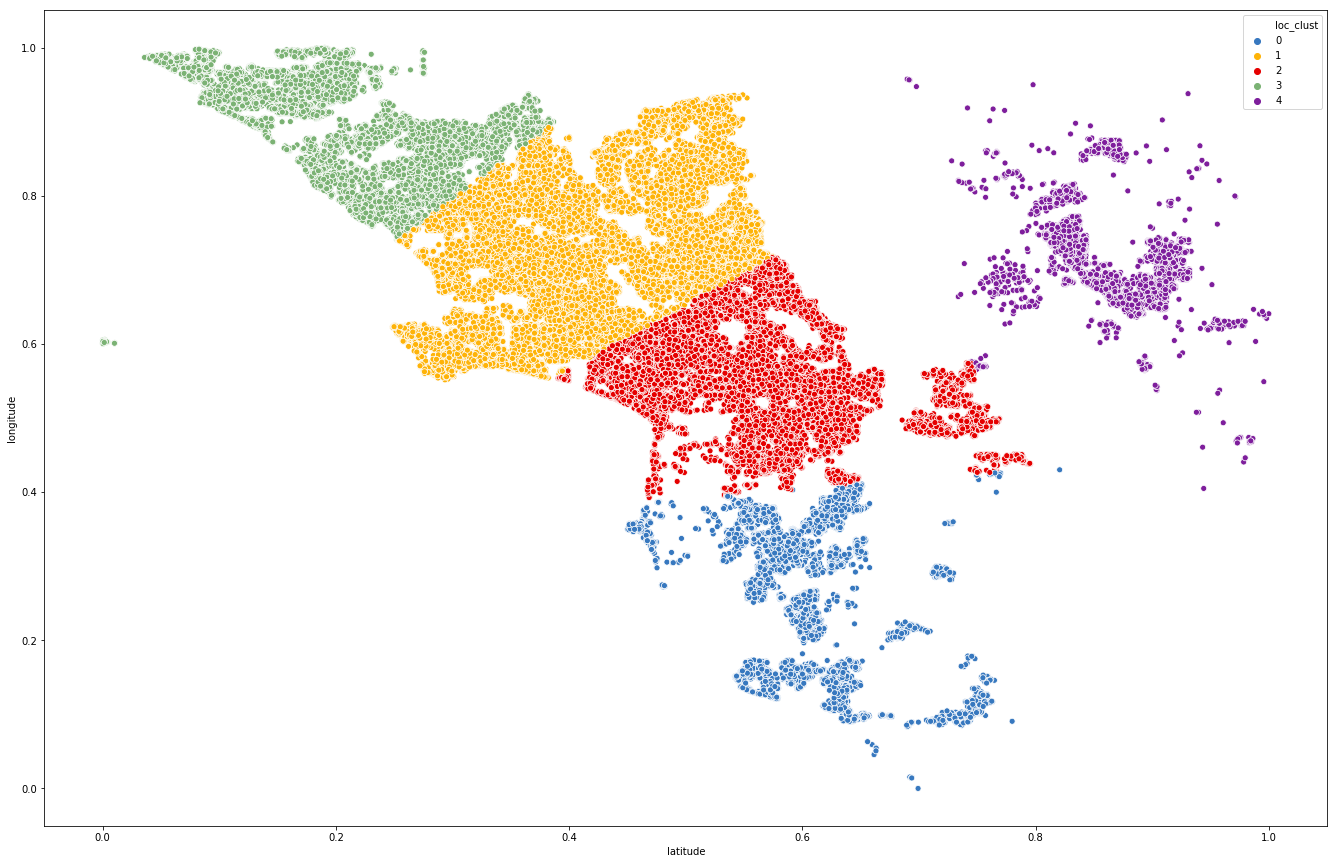

In [43]:
plt.subplots(figsize=(23,15))
colors = ["windows blue", "amber", "red", "faded green", "purple"]
wdf2['loc_clust'] = km.predict(wdf2[clust_vars])
sns.scatterplot(wdf2['latitude'],wdf2['longitude'],hue= wdf2['loc_clust'],legend='full',palette=sns.xkcd_palette(colors))

## REGRESSION TIME

In [44]:
reg = Ridge()
wdf = wdf.drop(columns=['error','tax value','square feet', 'bed and bath', 'fips','regionidcounty','yearbuilt','transactiondate','loc_clust'])
X_train,X_test, y_train,y_test = train_test_split(wdf.drop('logerror',axis=1), wdf['logerror'],random_state=123)
reg.fit(X_train,y_train)
train_predict = reg.predict(X_train)
test_predict = reg.predict(X_test)

In [45]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149689 entries, 0 to 167853
Data columns (total 7 columns):
bbcount                         149689 non-null float64
calculatedfinishedsquarefeet    149689 non-null float64
latitude                        149689 non-null float64
longitude                       149689 non-null float64
taxvaluedollarcnt               149689 non-null float64
logerror                        149689 non-null float64
age                             149689 non-null float64
dtypes: float64(7)
memory usage: 9.1 MB


In [46]:
rmse(y_train,train_predict)


0.024616471536534085

In [47]:
rmse(y_test,test_predict)


0.023462135373525657

In [48]:
rmses=[]
rmses2=[]
for i in range(5):
    reg = Ridge()
    df_by_loc[i] = df_by_loc[i].drop(columns=['error','tax value','square feet', 'bed and bath', 'fips','regionidcounty','yearbuilt','transactiondate'])
    X_train,X_test, y_train,y_test = train_test_split(df_by_loc[i].drop('logerror',axis=1), df_by_loc[i]['logerror'],random_state=123)
    reg.fit(X_train,y_train)
    train_predict = reg.predict(X_train)
    test_predict = reg.predict(X_test)
    rmses.append(rmse(y_train,train_predict))
    rmses2.append(rmse(y_test,test_predict))
    
    
    
    

Root Mean Squared of 5 Seperate Trains Sets

In [49]:
sum(rmses)/len(rmses)

0.023265381262136058

Root Mean Squared of 5 Seperate Test Sets

In [50]:
sum(rmses2)/len(rmses2)

0.024569333286418065